In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate
from scipy.linalg import eig
import numpy.linalg as la
from scipy.linalg import eigh_tridiagonal
# Minhas funçoes
# Potenciais
from funcoes import kronig_penney_potential
# Bases
from funcoes import Plane_wave,bloch_periodic
# Funcoes do algortimo
from funcoes import second_derivative,Plane_wave, bloch_periodic,derivative_matrix
from funcoes import integrand_matrix, matrix_Tmn, integrand_matrix_potential, matrix_Vmn , matrix_Hmn


In [2]:
# Parâmetros do problema
a = 0 # início do intervalo
b = 1 # final do intervalo
interval_number = 2000 # numero de divisoes do espaço

# step (h) do intervalo de x 

h = (b-a)/interval_number
V_0 = 50

In [3]:
# Arrays declarados
# x = np.linspace(a, b, interval_number,dtype=np.cdouble)
x = np.linspace(a, b, interval_number) # array com o intervalo
n = np.linspace(1, 10, 10) # numero de bases
K = np.linspace(-np.pi/b,np.pi/b,100)

In [4]:
V_x = kronig_penney_potential(x ,b,0.25 * b,V_0)
psi = Plane_wave(x,n,b)
# psi_bloch = bloch_periodic(x, K)
print(len(V_x))

2000


In [5]:
# psi = Plane_wave(x, n, b) # Cria a base
# bloch = bloch_periodic(x, K) # Funcao de bloch
psi_der = derivative_matrix(psi, n, h) # Calcula a derivada
integrand_matrix = integrand_matrix(psi,psi_der,n,interval_number) # Calcula a matrix  do integrando T_mn
T_mn = matrix_Tmn(integrand_matrix,x,n) # Calcula a matrix T_mn 
integrand_potential_matrix = integrand_matrix_potential(psi,V_x,n,interval_number) # Calcula a matrix  do integrando V_mn
V_mn = matrix_Vmn(integrand_potential_matrix,x,n) # Calcula a matrix V_mn
H_mn = matrix_Hmn(T_mn, V_mn,n)

/home/filipe/Computational-Physics/projeto2/funcoes.py:98: ComplexWarning: Casting complex values to real discards the imaginary part
  integrand_matrix[i][j] = list(integrand_list)
/home/filipe/Computational-Physics/projeto2/funcoes.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  integrand_potential_matrix[i][j] = list(integrand_list)


In [6]:
eig_values, eig_vecs = eig(H_mn)
eig_values = sorted(eig_values)

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


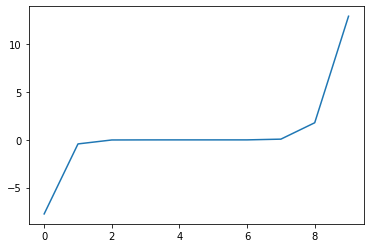

In [10]:
plt.plot(eig_values)